<h1 align="center">Volume 4: Inverse Problems.</h1>

    Marcelo Leszynski
    Section 002
    02/01/22

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [2]:
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0    # Just be careful that t0 != t1 and sol1 != beta
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)    # This is the update function
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    '''
    First find the derivative t that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may
have several. You may have to determine which solution is physically interesting. The following
bvp has at least two solutions. Using the secant method, find and plot both numerical solutions and
their initial slopes. What initial values t0, t1 did you use
to find them?

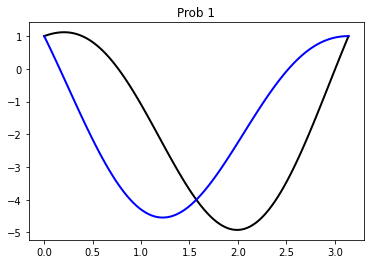

In [3]:
# initialize values to solve prob1 using provided code ##################
a = 0
b = np.pi
X = np.linspace(a, b, 100)
alpha = 1
beta = 1
maxI = 40
Y1 = solveSecant(ode, X, a, b, alpha, beta, 0, 1, maxI)
Y2 = solveSecant(ode, X, a, b, alpha, beta, -2, 2.5, maxI)

# plot results ##########################################################
plt.plot(X, Y1, '-k', linewidth=2)
plt.plot(X, Y2, '-b', linewidth=2)
plt.title('Prob 1')
plt.show()

# Problem 2

Use Newton's method to solve the BVP
y
00 = 3 +
2y
x
2
, x ∈ [1, e],
y(1) = 6,
y(e) = e
2 + 6/e.
Plot your solution.

In [4]:
def find_t2(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0    # Just be careful that t0 != t1 and sol1 != beta
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha, t0, 0, 1]), [a, b], atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha, t1, 0, 1]), [a, b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)/sol0    # This is the update function
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveNewton(f,X,a,b,alpha,beta,t0,t1,maxI):
    '''
    First find the derivative t that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    t = find_t2(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f, np.array([alpha, t, 0, 1]), X, atol=1e-10)[:,0]
    return sol

def ode_2(u, t):
    return np.array([u[1], 3 + (2*u[0])/(t**2), u[3], (2/(t**2)) * u[2]])

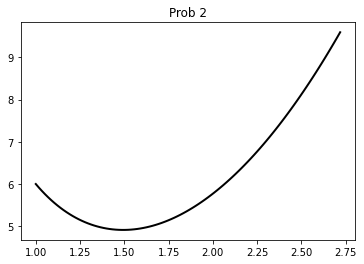

In [5]:
# initialize values to solve prob2 using provided code ##################
a = 1
b = np.exp(1)
X = np.linspace(a, b, 100)
alpha = 6
beta = np.exp(2) + (6/np.exp(1))
maxI = 100
Y = solveNewton(ode_2, X, a, b, alpha, beta, 0, 2, maxI)

# plot results ##########################################################
plt.plot(X, Y, '-k', linewidth=2)
plt.title('Prob 2')
plt.show()

# Problem 3

Suppose a projectile is fired from a cannon with velocity 45 m/s2
. At what angle
θ(0) should it be fired to land at a distance of 195 m?
There should be two initial angles θ(0) that produce a solution for this bvp. Use the
secant method to numerically compute and then plot both trajectories.
dy
dx = tan θ,
dv
dx = −
g sin θ + µv2
v cos θ
,
dθ
dx = −
g
v
2
,
y(0) = y(195) = 0,
v(0) = 45 m/s2
(20.8)
(g = 9.8067 m/s2
.) Find and plot both solutions for this boundary value problem when µ = .0003.
Compare with the solutions when µ = 0.

In [6]:
def find_t3(f, a, b, alpha, beta, v0, t0, t1, maxI, mu):
    sol1 = 1    # Just be careful that t0 != t1 and sol1 != beta
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f ,np.array([alpha, v0, t0]),\
                      [a, b], atol=1e-10, args=(mu,))[1, 0]
        sol1 = odeint(f, np.array([alpha, v0, t1]),\
                      [a, b], atol=1e-10, args=(mu,))[1, 0]
        t2 = t1 - (sol1 - beta)*(t1 - t0)/(sol1 - sol0)    # This is the update function
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant_3(f, X, a, b, alpha, beta, v0, t0, t1, maxI, mu):
    '''
    First find the derivative t that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    t = find_t3(f, a, b, alpha, beta, v0, t0, t1, maxI, mu)
    sol = odeint(f, np.array([alpha, v0 ,t]), X,\
                 atol=1e-10, args=(mu,))[:, 0]
    return sol

def ode_3(u,x,mu=0.0003):
    g = 9.8067
    return np.array([np.tan(u[2]), -(g*np.sin(u[2]) + mu*u[1]**2)/\
                     (u[1]*np.cos(u[2])), -g/(u[1]**2)])

/home/celo/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

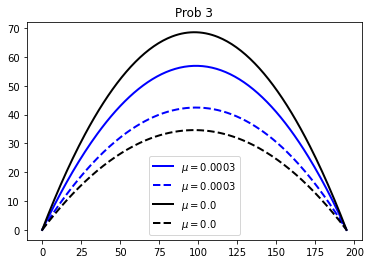

In [7]:
# initialize values to solve prob3 using provided code ##################
a = 0
b = 195
alpha = 0
beta = 0
v0 = 45
maxI = 100

mu = 0.0003
X = np.linspace(a, b, 200)
Y_mu1a = solveSecant_3(ode_3, X, a, b, alpha, beta, v0, 0, 1, maxI, mu)
Y_mu1b = solveSecant_3(ode_3, X, a, b, alpha, beta, v0, 1, 3, maxI, mu)

mu = 0.
Y_mu2a = solveSecant_3(ode_3, X, a, b, alpha, beta, v0, 0, 1, maxI, mu)
Y_mu2b = solveSecant_3(ode_3, X, a, b, alpha, beta, v0, 3, 7, maxI, mu)

# plot results ##########################################################
plt.plot(X, Y_mu1a, '-b', linewidth=2, label='$\mu=0.0003$')
plt.plot(X, Y_mu1b, '--b', linewidth=2, label='$\mu=0.0003$')
plt.plot(X, Y_mu2a, '-k', linewidth=2, label='$\mu=0.0$')
plt.plot(X, Y_mu2b, '--k', linewidth=2, label='$\mu=0.0$')
plt.legend()
plt.title('Prob 3')
plt.show